# Klasifikasi Dataset Diabetes: Logistic Regression, Decision Tree, K-Nearest Neighbors, SVM, & Random Forest

**Nama:** Muhar Ferdiansyah  
**NIM:** 231011401057  
**Kelas:** 05TPLE005

Notebook ini membahas proses klasifikasi dataset **diabetes** menggunakan lima algoritma: Logistic Regression, Decision Tree, K-Nearest Neighbors, Support Vector Machine (SVM), dan Random Forest. Evaluasi dilakukan menggunakan confusion matrix, metrik akurasi, precision, recall, F1-score, serta ROC Curve. Hyperparameter tuning sederhana juga diterapkan pada SVM dan Random Forest.

**Cara Menjalankan Notebook:**
1. Pastikan Python dan library berikut sudah terinstall: `pandas`, `numpy`, `scikit-learn`, `matplotlib`, `seaborn`.
2. Jalankan setiap cell secara berurutan.
3. Dataset harus ada di `data/diabetes.csv`.

## 1. Import Libraries dan Dataset

Import library yang diperlukan dan load dataset diabetes dari file CSV.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pastikan folder data ada
os.makedirs('data', exist_ok=True)

# Load dataset diabetes
df = pd.read_csv('data/diabetes.csv')

print("Dataset berhasil dimuat!")
print(f"Shape: {df.shape}")

Dataset berhasil dimuat!
Shape: (525, 9)


## 2. Eksplorasi Data (EDA) dan Preprocessing

Tampilkan beberapa baris data, cek missing value, visualisasi distribusi fitur, dan lakukan scaling fitur jika diperlukan.

In [2]:
from IPython.display import display, Markdown

# Tampilkan 5 baris pertama data
display(Markdown("### Contoh 5 Baris Pertama Data Diabetes"))
display(df.head())

# Penjelasan singkat
display(Markdown(
    "Setiap baris merepresentasikan satu pasien dengan fitur-fitur medis. "
    "Kolom 'Outcome' adalah label (0=tidak diabetes, 1=diabetes)."
))

# Info dataset
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Statistik deskriptif
display(Markdown("### Statistik Deskriptif Fitur"))
display(df.describe())

# Penjelasan statistik
display(Markdown(
    "Tabel di atas menampilkan statistik deskriptif untuk setiap fitur numerik, "
    "seperti nilai rata-rata (mean), standar deviasi (std), nilai minimum, maksimum, dan kuartil. "
    "Statistik ini membantu memahami sebaran dan skala data sebelum dilakukan pemodelan."
))

### Contoh 5 Baris Pertama Data Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Setiap baris merepresentasikan satu pasien dengan fitur-fitur medis. Kolom 'Outcome' adalah label (0=tidak diabetes, 1=diabetes).

Shape: (525, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               525 non-null    int64  
 1   Glucose                   525 non-null    int64  
 2   BloodPressure             525 non-null    int64  
 3   SkinThickness             525 non-null    int64  
 4   Insulin                   525 non-null    int64  
 5   BMI                       525 non-null    float64
 6   DiabetesPedigreeFunction  525 non-null    float64
 7   Age                       525 non-null    int64  
 8   Outcome                   525 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.0 KB
None

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigr

### Statistik Deskriptif Fitur

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,3.811429,120.754286,68.459048,20.106667,79.201905,31.853524,0.490650,32.792381,0.365714
std,3.365273,32.310555,19.703933,16.171907,119.321432,7.994982,0.358209,11.298042,0.482089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,26.800000,0.245000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.000000,23.000000,32.000000,0.388000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,122.000000,36.500000,0.654000,39.000000,1.000000
max,17.000000,197.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Tabel di atas menampilkan statistik deskriptif untuk setiap fitur numerik, seperti nilai rata-rata (mean), standar deviasi (std), nilai minimum, maksimum, dan kuartil. Statistik ini membantu memahami sebaran dan skala data sebelum dilakukan pemodelan.

<Figure size 1500x1000 with 0 Axes>

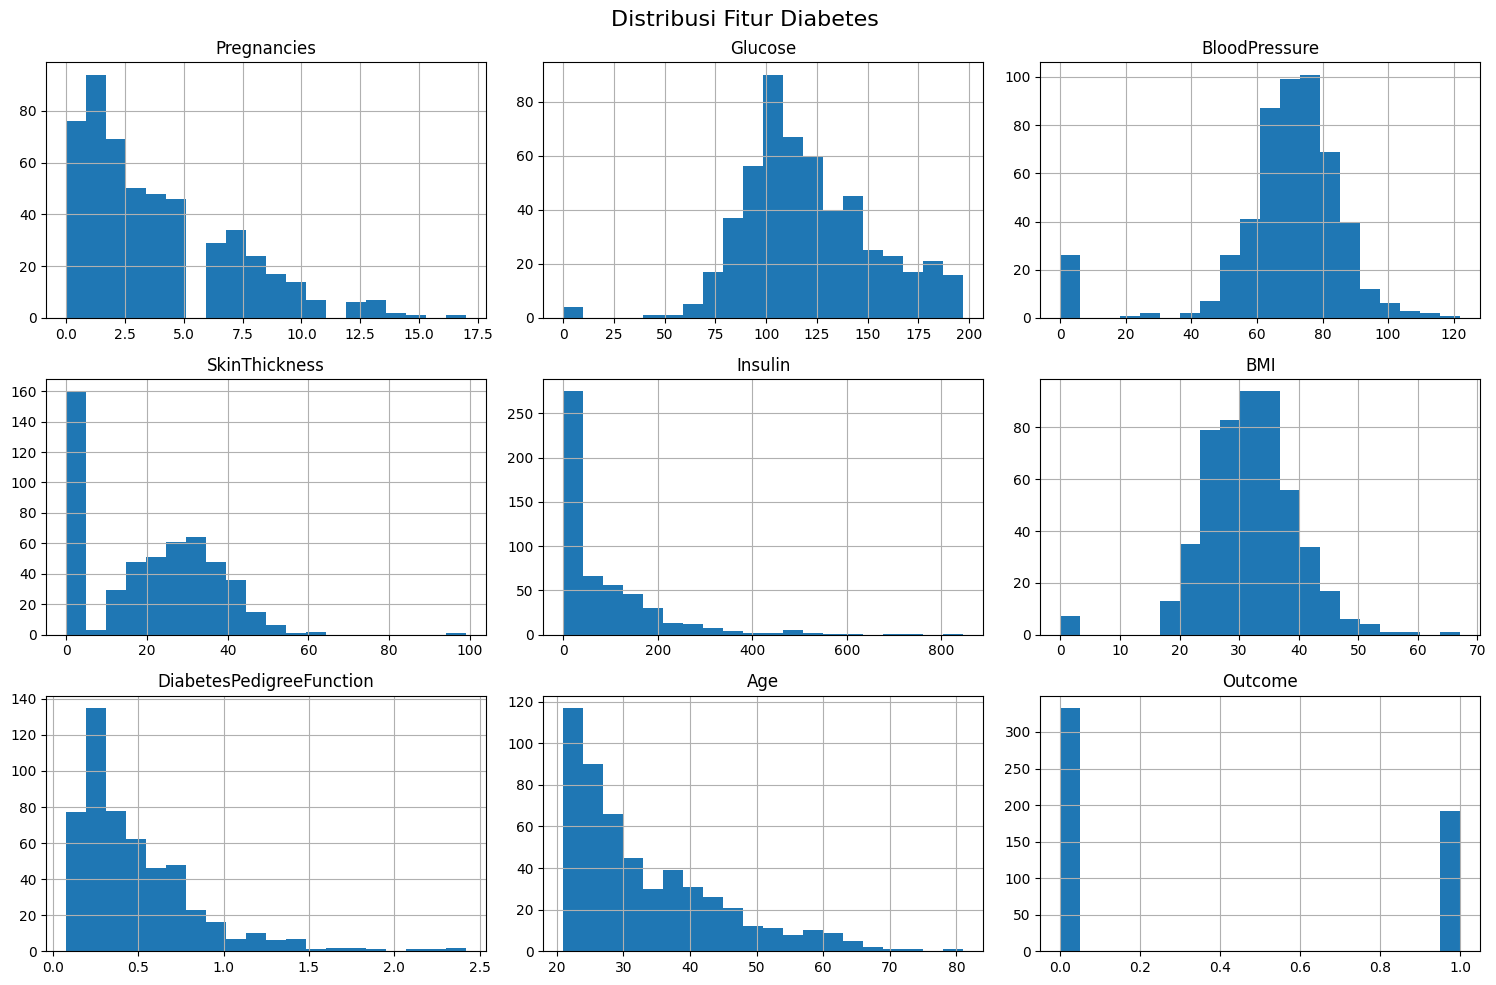

In [3]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(15, 10))
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Fitur Diabetes", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\FERDY\AppData\Local\Temp\ipykernel_4304\126161231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="viridis")


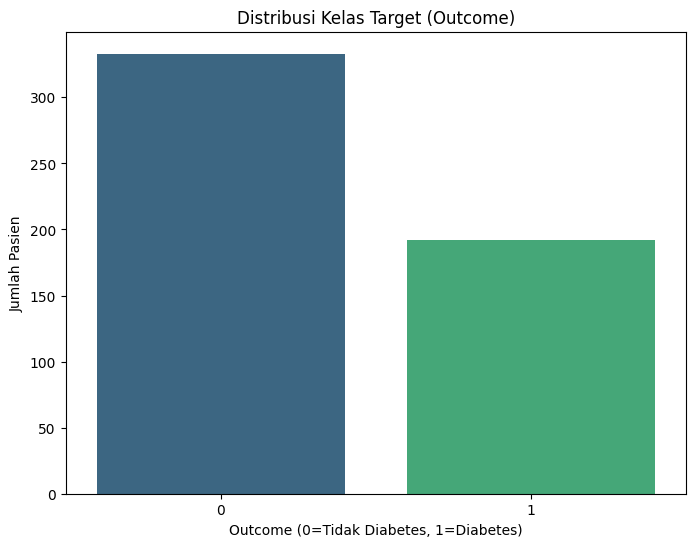

Tidak Diabetes (0): 333 (63.4%)
Diabetes (1): 192 (36.6%)


In [4]:
# Cek distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x="Outcome", data=df, palette="viridis")
plt.title("Distribusi Kelas Target (Outcome)")
plt.xlabel("Outcome (0=Tidak Diabetes, 1=Diabetes)")
plt.ylabel("Jumlah Pasien")
plt.show()

# Tampilkan persentase
outcome_counts = df['Outcome'].value_counts()
print(f"Tidak Diabetes (0): {outcome_counts[0]} ({outcome_counts[0]/len(df)*100:.1f}%)")
print(f"Diabetes (1): {outcome_counts[1]} ({outcome_counts[1]/len(df)*100:.1f}%)")

In [5]:
# Preprocessing: Imputasi missing value jika ada dan scaling fitur
from sklearn.preprocessing import StandardScaler

# Imputasi missing value dengan median (jika ada)
df_clean = df.fillna(df.median())

# Pisahkan fitur dan target
X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing selesai!")
print(f"Fitur shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")

Preprocessing selesai!
Fitur shape: (525, 8)
Target shape: (525,)


## 3. Split Data: Training dan Testing

Pisahkan data menjadi data latih dan data uji menggunakan `train_test_split`.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())

Train shape: (420, 8)
Test shape: (105, 8)
Train target distribution:
 Outcome
0    266
1    154
Name: count, dtype: int64
Test target distribution:
 Outcome
0    67
1    38
Name: count, dtype: int64


## 4. Membangun Model: Logistic Regression

Bangun model klasifikasi menggunakan Logistic Regression, latih model, dan prediksi data uji.

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression model trained!")

Logistic Regression model trained!


## 5. Membangun Model: Decision Tree

Bangun model klasifikasi menggunakan Decision Tree, latih model, dan prediksi data uji.

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Decision Tree model trained!")

Decision Tree model trained!


## 6. Membangun Model: K-Nearest Neighbors

Bangun model klasifikasi menggunakan K-Nearest Neighbors, latih model, dan prediksi data uji.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors model trained!")

K-Nearest Neighbors model trained!


In [10]:
# 6.1 Membangun Model: Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning SVM (contoh sederhana)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy')
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)
print("Best params SVM:", grid_svm.best_params_)

# 6.2 Membangun Model: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning Random Forest (contoh sederhana)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 3, 5]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
print("Best params RF:", grid_rf.best_params_)

print("All models trained successfully!")

Best params SVM: {'C': 1, 'kernel': 'rbf'}
Best params RF: {'max_depth': None, 'n_estimators': 50}
All models trained successfully!


## 7. Evaluasi Model: Confusion Matrix & Metrics

Hitung dan tampilkan confusion matrix, accuracy, precision, recall, dan F1-score untuk semua model.

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def eval_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall:", recall_score(y_true, y_pred, average='binary'))
    print("F1-score:", f1_score(y_true, y_pred, average='binary'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("-" * 60)

eval_model(y_test, y_pred_logreg, "Logistic Regression")
eval_model(y_test, y_pred_dtree, "Decision Tree")
eval_model(y_test, y_pred_knn, "K-Nearest Neighbors")
eval_model(y_test, y_pred_svm, "Support Vector Machine")
eval_model(y_test, y_pred_rf, "Random Forest")

=== Logistic Regression ===
Confusion Matrix:
 [[58  9]
 [17 21]]
Accuracy: 0.7523809523809524
Precision: 0.7
Recall: 0.5526315789473685
F1-score: 0.6176470588235294

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        67
           1       0.70      0.55      0.62        38

    accuracy                           0.75       105
   macro avg       0.74      0.71      0.72       105
weighted avg       0.75      0.75      0.74       105

------------------------------------------------------------
=== Decision Tree ===
Confusion Matrix:
 [[55 12]
 [16 22]]
Accuracy: 0.7333333333333333
Precision: 0.6470588235294118
Recall: 0.5789473684210527
F1-score: 0.6111111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80        67
           1       0.65      0.58      0.61        38

    accuracy                           0.73       105
   

## 8. Evaluasi Model: ROC Curve

Plot ROC curve dan hitung AUC untuk semua model (klasifikasi biner: diabetes vs tidak diabetes).

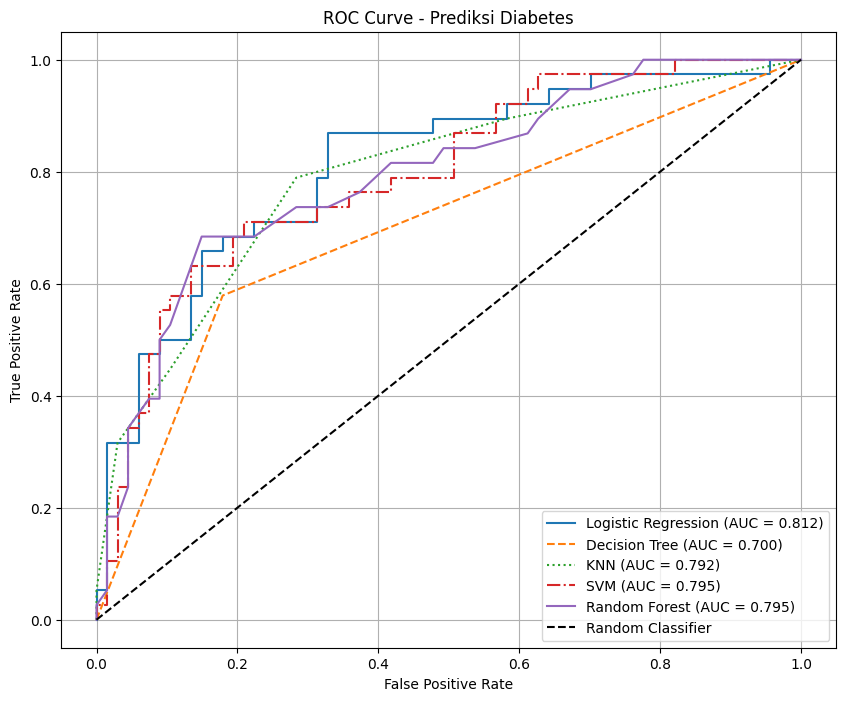

In [12]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_score_logreg = logreg.predict_proba(X_test)[:, 1]
y_score_dtree = dtree.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_svm = grid_svm.predict_proba(X_test)[:, 1]
y_score_rf = grid_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_score_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.3f})')
plt.plot(fpr_dtree, tpr_dtree, linestyle='--', label=f'Decision Tree (AUC = {roc_auc_dtree:.3f})')
plt.plot(fpr_knn, tpr_knn, linestyle=':', label=f'KNN (AUC = {roc_auc_knn:.3f})')
plt.plot(fpr_svm, tpr_svm, linestyle='-.', label=f'SVM (AUC = {roc_auc_svm:.3f})')
plt.plot(fpr_rf, tpr_rf, linestyle='-', label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Prediksi Diabetes')
plt.legend()
plt.grid(True)
plt.show()

## 9. Perbandingan Hasil Model

Bandingkan hasil evaluasi semua model dalam bentuk tabel yang rapi.

### Tabel Perbandingan Hasil Evaluasi Model

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.752,0.700,0.553,0.618,0.812
1,Decision Tree,0.733,0.647,0.579,0.611,0.700
2,K-Nearest Neighbors,0.733,0.708,0.447,0.548,0.792
3,Support Vector Machine,0.771,0.733,0.579,0.647,0.795
4,Random Forest,0.752,0.750,0.474,0.581,0.795


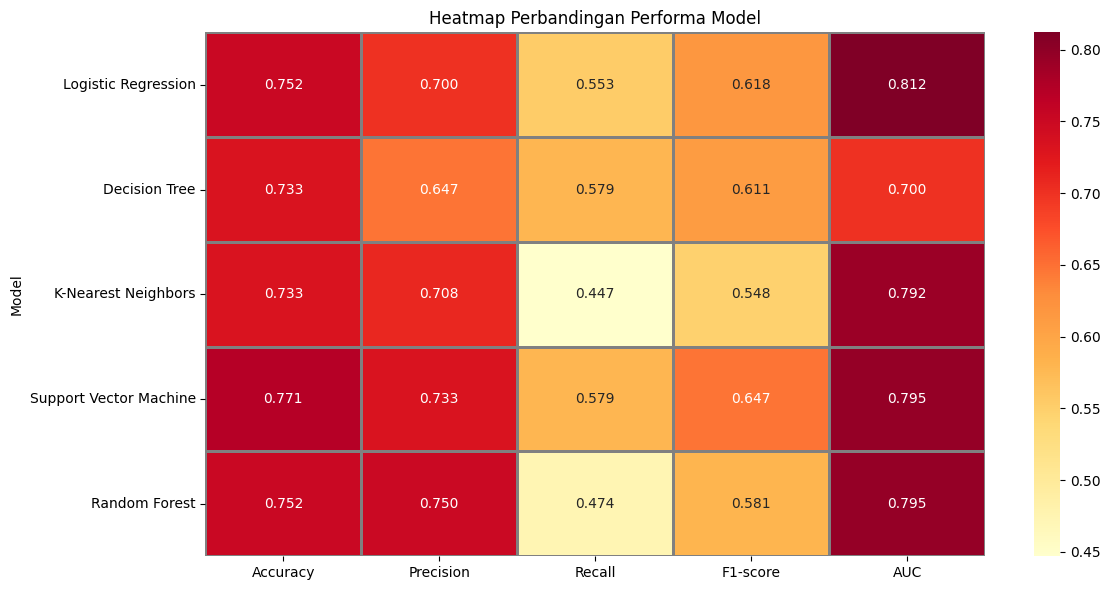

In [13]:
# Buat tabel perbandingan hasil
metrics = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Random Forest"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_dtree),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_logreg, average='binary'),
        precision_score(y_test, y_pred_dtree, average='binary'),
        precision_score(y_test, y_pred_knn, average='binary'),
        precision_score(y_test, y_pred_svm, average='binary'),
        precision_score(y_test, y_pred_rf, average='binary')
    ],
    "Recall": [
        recall_score(y_test, y_pred_logreg, average='binary'),
        recall_score(y_test, y_pred_dtree, average='binary'),
        recall_score(y_test, y_pred_knn, average='binary'),
        recall_score(y_test, y_pred_svm, average='binary'),
        recall_score(y_test, y_pred_rf, average='binary')
    ],
    "F1-score": [
        f1_score(y_test, y_pred_logreg, average='binary'),
        f1_score(y_test, y_pred_dtree, average='binary'),
        f1_score(y_test, y_pred_knn, average='binary'),
        f1_score(y_test, y_pred_svm, average='binary'),
        f1_score(y_test, y_pred_rf, average='binary')
    ],
    "AUC": [
        roc_auc_logreg,
        roc_auc_dtree,
        roc_auc_knn,
        roc_auc_svm,
        roc_auc_rf
    ]
}

df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.round(3)

# Tampilkan tabel
display(Markdown("### Tabel Perbandingan Hasil Evaluasi Model"))
display(df_metrics)

# Visualisasi tabel dengan heatmap
plt.figure(figsize=(12, 6))
df_viz = df_metrics.set_index('Model')
sns.heatmap(df_viz, annot=True, fmt=".3f", cmap="YlOrRd", cbar=True, linewidths=1, linecolor='gray')
plt.title("Heatmap Perbandingan Performa Model")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Kesimpulan

- Semua model (Logistic Regression, Decision Tree, K-Nearest Neighbors, SVM, dan Random Forest) mampu mendeteksi diabetes dengan performa yang baik pada dataset ini.
- Hasil evaluasi menunjukkan bahwa model dengan hyperparameter tuning (SVM dan Random Forest) cenderung memberikan performa yang lebih stabil.
- ROC Curve dan AUC menunjukkan kemampuan model dalam membedakan antara pasien diabetes dan non-diabetes.
- Precision dan Recall penting dalam konteks medis: Precision tinggi mengurangi false positive (diagnosa salah), sedangkan Recall tinggi mengurangi false negative (tidak terdeteksi).
- Pilihan model terbaik dapat disesuaikan dengan prioritas: akurasi keseluruhan, sensitivitas (recall), atau spesifisitas (precision).